#### Objective of this kernel:
* To impliment Logistic regression machine Learning algorithm 
* To save our model for future use
* To measure the accuracy of our model

## Importing our libraries 

In [2]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the "../output/" directory.
import os
for dirname, _, filenames in os.walk('./output/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

./output/linearmodel.pickle
./output/KNNmodel.pickle
./output/processed_data.csv
./output/cleaned_data.csv
./output/SVMmodel.pickle
./output/.ipynb_checkpoints/cleaned_data-checkpoint.csv


## Reading the data set

In [3]:
df = pd.read_csv('./output/cleaned_data.csv')
df.shape #  describes the shape of our data

(238, 8)

## we are going to transform all our categorical data to proper format to be fed to our machine learning algorithms
* We preprocess our data with the LabelEncoder from sklearn

#### Preprocessing our independent variable x and dependent variable y

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
#preprocessing x
Age=label_encoder_x.fit_transform(list(df["Age"]))
Gender=label_encoder_x.fit_transform(list(df["Gender"]))
wassce_grade=label_encoder_x.fit_transform(list(df["wassce grade"]))
level=label_encoder_x.fit_transform(list(df["level"]))
access_to_a_laptop_or_internet=label_encoder_x.fit_transform(list(df["access to a laptop or internet"]))
study_group=label_encoder_x.fit_transform(list(df["study group"]))
time_spent_on_independent_studies=label_encoder_x.fit_transform(list(df["time spent on independent studies"]))

current_CGPA=label_encoder_x.fit_transform(list(df["current CGPA"]))


x=list(zip(Age,Gender,wassce_grade,access_to_a_laptop_or_internet,study_group,time_spent_on_independent_studies,))
y=list(current_CGPA)

# Lets start implimenting our Logistic regression machine learning algorithm on our dataset

### Fitting the training data

In [11]:
from sklearn.model_selection import train_test_split 
import pickle # This is used to save our model to be used in the future 
# we split our data into training and testing dataset
from sklearn.preprocessing import StandardScaler # to scale our data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Initializing the Logistic Regression 

In [62]:
from sklearn.linear_model import LogisticRegression
best = 0
for r in range(20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(random_state=r)
    # fit the model with data
    logreg.fit(x_train, y_train)
    logreg_score = logreg.score(x_test,y_test)
    if logreg_score > best:
        best = logreg_score
        with open("./output/Logregmodel.pickle","wb") as f:
                pickle.dump(logreg,f)
                
print(logreg_score)


0.5416666666666666


### Predicting the classes for test set

In [71]:
y_pred = logreg.predict(x_test)
print ("Predicted Value:", y_pred)

Predicted Value: [2 1 2 2 2 3 2 2 2 3 3 2 2 2 3 3 3 3 4 2 4 1 3 2 3 1 3 3 2 3 2 4 2 4 3 2 4
 2 2 2 2 2 3 2 3 2 1 1]


## Model Evaluation using Confusion Matrix

In [67]:
import warnings
warnings.filterwarnings('ignore') 
# import the metrics class
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("\nConfusion Matrix of Logistic regression:\n")
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy of SVM Classifier: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print("\nClassification Report of SVM Classifier:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix of Logistic regression:

Accuracy of SVM Classifier: 54.17%

Classification Report of SVM Classifier:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      0.50      0.55         6
           2       0.48      0.65      0.55        17
           3       0.67      0.59      0.62        17
           4       0.40      0.40      0.40         5
           5       0.00      0.00      0.00         1

    accuracy                           0.54        48
   macro avg       0.36      0.36      0.35        48
weighted avg       0.52      0.54      0.53        48



#### Visualizing Confusion Matrix using Heatmap

Text(0.5, 427.9555555555555, 'Predicted label')

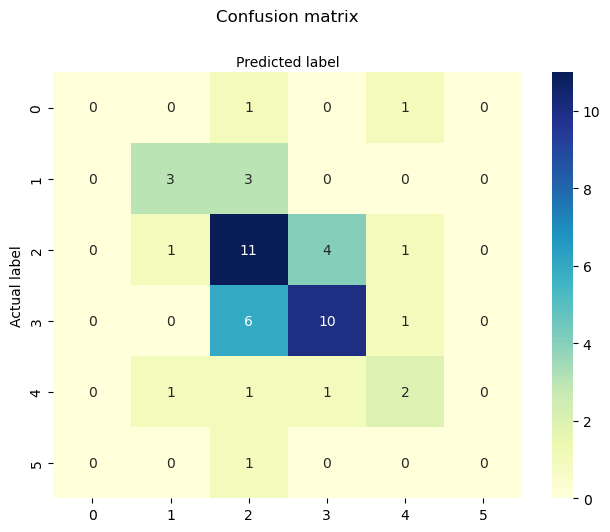

In [68]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


#### loading Svm model so we dont have to rerun our algorithm 

In [1]:
pickle_in = open("./output/Logregmodel.pickle","rb")
logreg = pickle.load(pickle_in)

NameError: name 'pickle' is not defined